C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using ve

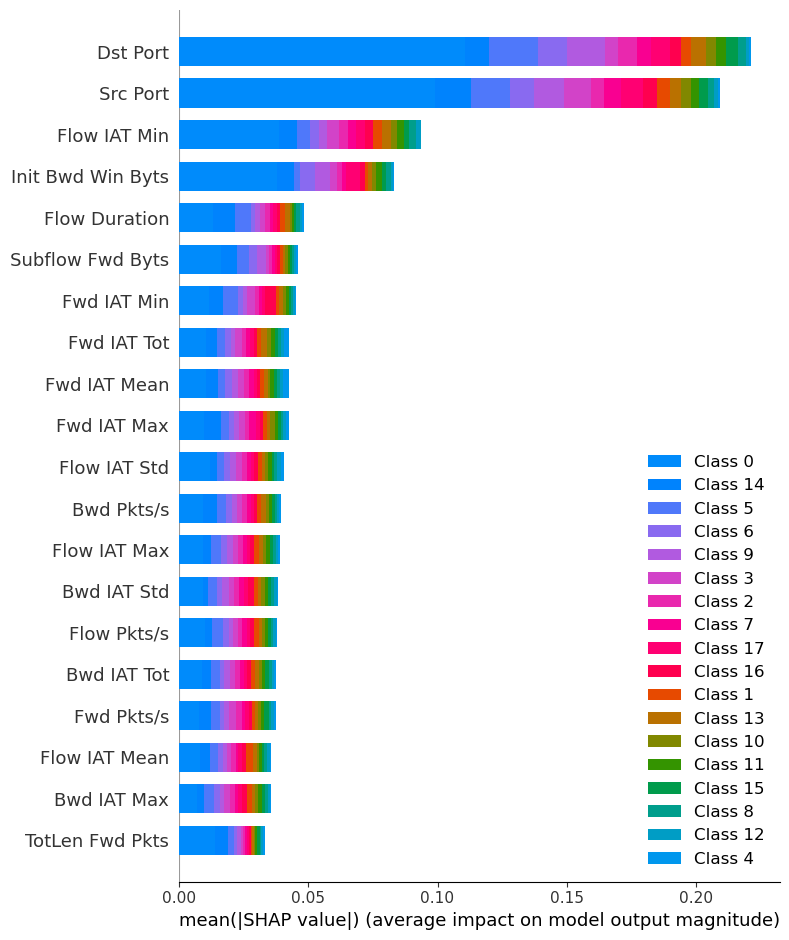

In [2]:
# ✅ Step 0: Imports
import shap
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Step 1: Load test data
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()

# ✅ Step 2: Load trained Weighted RF model and its scaler
model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\random_forest_weighted_model.pkl")
scaler = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\global_scaler_rf_weighted.pkl")

# ✅ Step 3: Scale test data
X_scaled = scaler.transform(X_test)

# ✅ Step 4: SHAP summary for global interpretation
explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled, check_additivity=False)

# ✅ Step 5: SHAP summary plot
shap.summary_plot(shap_values, X_scaled, feature_names=X_test.columns, show=True)


In [5]:
# Step 2: SHAP Force Plot for Individual Prediction (e.g., instance #100)
# ✅ Step 1: Imports
import shap
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ✅ Step 2: Load test data
X_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\X_test.csv")
y_test = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\y_test.csv").squeeze()

# ✅ Step 3: Load trained RF model and scaler
model = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\random_forest_weighted_model.pkl")
scaler = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\global_scaler_rf_weighted.pkl")

# ✅ Step 4: Scale test features
X_scaled = scaler.transform(X_test)

# ✅ Step 5: Initialize SHAP explainer
explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled, check_additivity=False)

# ✅ Step 6: Pick an instance index to explain (e.g., 100th sample)
instance_index = 100
class_index = 14  # e.g., Replay – Complete (Update as needed)

# ✅ Step 7: Generate force plot
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[class_index],
    shap_values=shap_values[instance_index, :, class_index],
    features=X_scaled[instance_index],
    feature_names=X_test.columns
)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using ve

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [6]:
# ✅ SHAP Force Plot – Local Explanation for One Instance

import shap
import matplotlib.pyplot as plt

# Initialize visualization
shap.initjs()

# ✅ Recommendation: Set instance index safely
instance_index = 500     # One safe mid-row to explain
class_index = 14         # Replay attack class (can change later if needed)

# ✅ Generate interactive force plot
shap.force_plot(
    base_value=shap_values.base_values[instance_index, class_index],
    shap_values=shap_values.values[instance_index, :, class_index],
    features=shap_values.data[instance_index],
    feature_names=X_test.columns
)


In [7]:
# Save interactive output
force_plot = shap.force_plot(
    base_value=shap_values.base_values[instance_index, class_index],
    shap_values=shap_values.values[instance_index, :, class_index],
    features=shap_values.data[instance_index],
    feature_names=X_test.columns
)

shap.save_html("force_plot_rf_instance500_class14.html", force_plot)


In [8]:
# ✅ SHAP Force Plot – Local Explanation for One Instance

import shap
import matplotlib.pyplot as plt

# ✅ Initialize visualization (only once per notebook)
shap.initjs()

# ✅ Set target class and instance
# Example 1: class_index = 14 (Replay - Complete), instance_index = 500
# Example 2: class_index = 4  (Command Injection), instance_index = 100
# Example 3: class_index = 0  (Benign), instance_index = 800

class_index = 14         # 🔁 Change this for different attack types
instance_index = 500     # 🔁 Change this for different test rows

# ✅ Generate force plot
shap.force_plot(
    base_value=shap_values.base_values[instance_index, class_index],
    shap_values=shap_values.values[instance_index, :, class_index],
    features=shap_values.data[instance_index],
    feature_names=X_test.columns
)


In [10]:
# ✅ SHAP Force Plot – Local Explanation for One Instance

import shap
import matplotlib.pyplot as plt

# ✅ Initialize visualization (only once per notebook)
shap.initjs()

# ✅ Set target class and instance
# Example 1: class_index = 14 (Replay - Complete), instance_index = 500
# Example 2: class_index = 4  (Command Injection), instance_index = 100
# Example 3: class_index = 0  (Benign), instance_index = 800

# Example for Command Injection
class_index = 4         # 🔁 Change this for different attack types
instance_index = 100     # 🔁 Change this for different test rows

# ✅ Generate force plot
shap.force_plot(
    base_value=shap_values.base_values[instance_index, class_index],
    shap_values=shap_values.values[instance_index, :, class_index],
    features=shap_values.data[instance_index],
    feature_names=X_test.columns
)


In [11]:
# ✅ SHAP Force Plot – Local Explanation for One Instance

import shap
import matplotlib.pyplot as plt

# ✅ Initialize visualization (only once per notebook)
shap.initjs()

# ✅ Set target class and instance
# Example 1: class_index = 14 (Replay - Complete), instance_index = 500
# Example 2: class_index = 4  (Command Injection), instance_index = 100
# Example 3: class_index = 0  (Benign), instance_index = 800

# Example for Benign
class_index = 0         # 🔁 Change this for different attack types
instance_index = 800     # 🔁 Change this for different test rows

# ✅ Generate force plot
shap.force_plot(
    base_value=shap_values.base_values[instance_index, class_index],
    shap_values=shap_values.values[instance_index, :, class_index],
    features=shap_values.data[instance_index],
    feature_names=X_test.columns
)


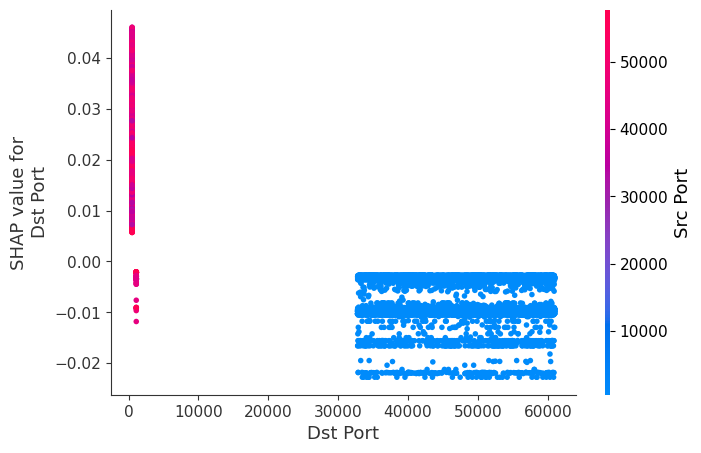

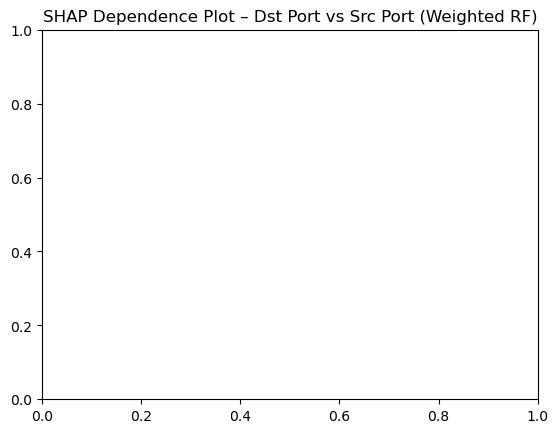

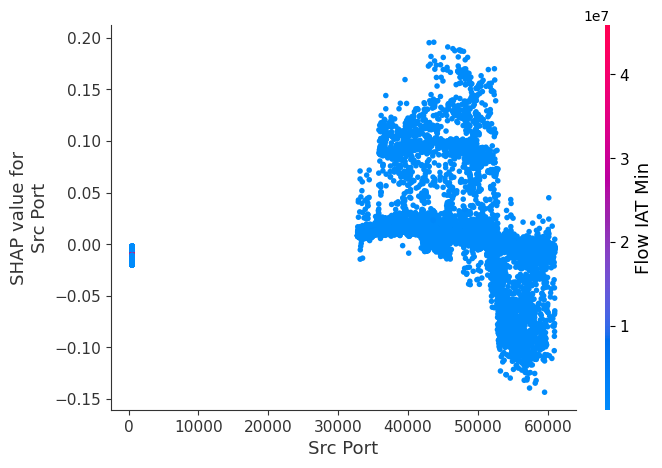

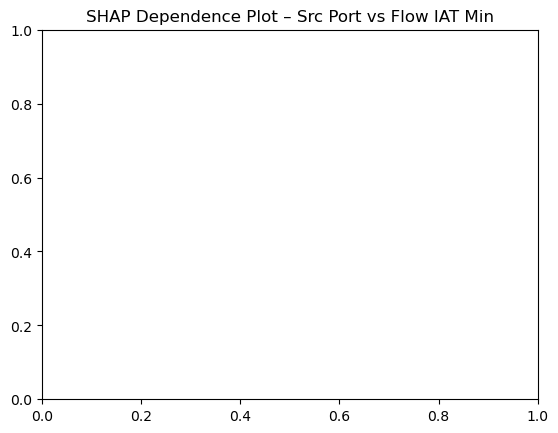

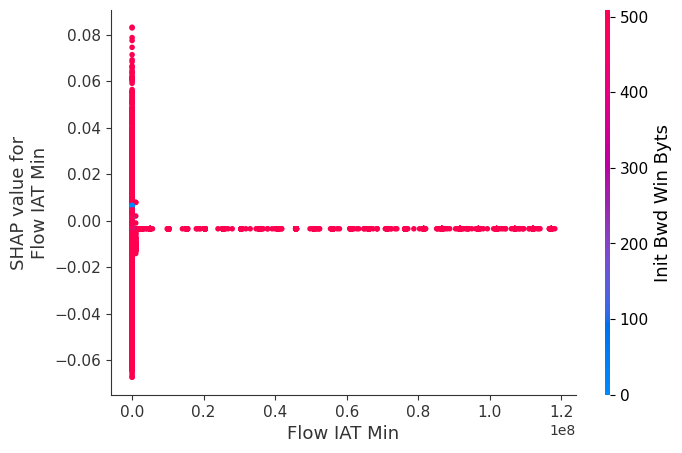

Text(0.5, 1.0, 'SHAP Dependence Plot – Flow IAT Min vs Init Bwd Win Byts')

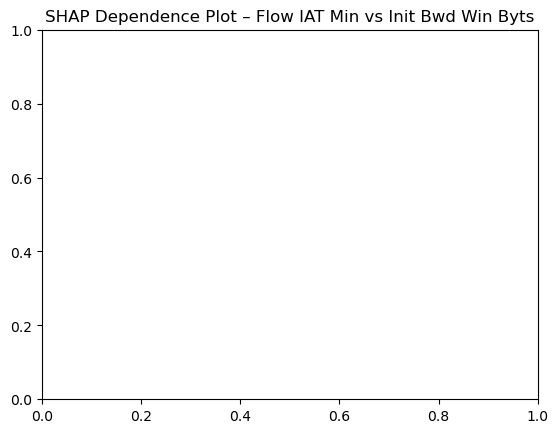

In [15]:
# SHAP Dependence Plots (Weighted RF)
import shap
import matplotlib.pyplot as plt

# ✅ Step 1: Pick class index (e.g., 14 = Replay - Complete)
class_index = 14

# ✅ Step 2: Extract SHAP values for this class only
shap_values_class = shap_values.values[:, :, class_index]  # (samples, features)

# ✅ Step 3: Plot 1 – Dst Port vs Src Port
shap.dependence_plot(
    "Dst Port",
    shap_values_class,
    X_test,                  # original features, not scaled
    interaction_index="Src Port",
    show=True
)
plt.title("SHAP Dependence Plot – Dst Port vs Src Port (Weighted RF)")

# ✅ Step 4: Plot 2 – Src Port vs Flow IAT Min
shap.dependence_plot(
    "Src Port",
    shap_values_class,
    X_test,
    interaction_index="Flow IAT Min",
    show=True
)
plt.title("SHAP Dependence Plot – Src Port vs Flow IAT Min")

# ✅ Step 5: Plot 3 – Flow IAT Min vs Init Bwd Win Byts
shap.dependence_plot(
    "Flow IAT Min",
    shap_values_class,
    X_test,
    interaction_index="Init Bwd Win Byts",
    show=True
)
plt.title("SHAP Dependence Plot – Flow IAT Min vs Init Bwd Win Byts")
